In [ ]:
!pip install faiss-cpu

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [ ]:
!pip install ftfy

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import Sampler
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import re
import utils.clip
from utils.clip.simple_tokenizer import SimpleTokenizer
import faiss
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Load CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
#model, preprocess = utils.clip.load("ViT-B/32",device=device,jit=False)
model, preprocess = utils.clip.load("/data-output/utils/clip/ViT-B-32.pt",device=device,jit=False)
# Get embedding size
embed_dim = model.text_projection.shape[1]
embed_dim

512

Image to be processed


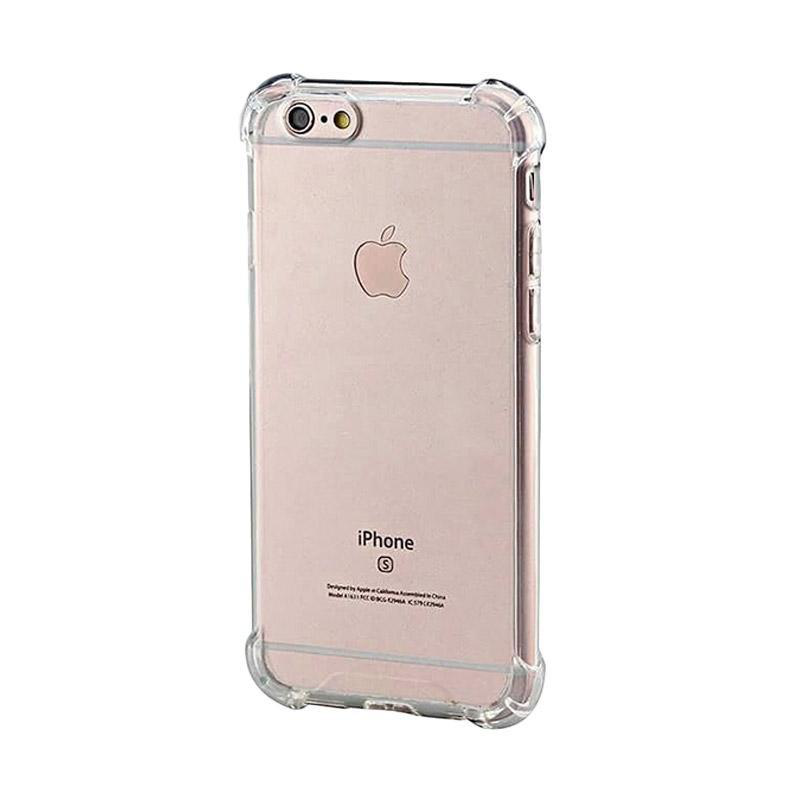



Tensor shape:
torch.Size([1, 3, 224, 224])


In [ ]:
from PIL import Image
import requests



#03ed1de3688c83c139aef39088aad083.jpg ：Hard Case Bahan Karet Silikon Matte Warna Kontras Untuk iphone 6 6s 
#09217c9ba8833172f4e0d78665bf549f.jpg ： Softcase Casing for iPhone 6  6s Case Anti Crack  Anti Shock


# 加载图片
# image = Image.open("/data-output/dog.png")
image = Image.open("/data-output/train_images/09217c9ba8833172f4e0d78665bf549f.jpg")
print("Image to be processed")
display(image)
 
# 预处理图像
image = preprocess(image).unsqueeze(0).to(device)
print("\n\nTensor shape:")
print(image.shape)

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image)

In [ ]:
# text_snippets = ["The Body Shop Chinese Ginseng & Rice Clarifying Mask 15Ml", 
#                  "BSB gantungan hp strap phone tali leher motif sport all type hp",
#                  "Crystallure Supreme Revitalizing Oil Serum 30ml"]

# text_snippets = ["a photo of a dog", "a photo of a cat", "a photo of a wolf"]
# text_snippets = ["a dog on the grass", "a dog in the water", "a dog behind the grass"]

# text_snippets = ["Hard Case Bahan Karet Silikon Matte Warna Kontras Untuk iphone 6 6s", 
#                  "Apple Lightning To 3.5mm Headphone Jack Adapter Connector iPhone 7 7Plus 8 8Plus X XS XS MAX XR",
#                  "Softcase Casing for iPhone 6  6s Case Anti Crack  Anti Shock",
#                  "Vivo V11 V15 Case Robot/Phantom Standing"
#                 ]

text_snippets = ["iphone 6", 
                 "iPhone X",
                 "Xiaomi 11",
                 "Vivo V11"
                ]
 
# 预处理文本
text = utils.clip.tokenize(text_snippets).to(device)
print(text.shape)
with torch.no_grad():
    text_features = model.encode_text(text)
print(text_features.shape)

torch.Size([4, 77])
torch.Size([4, 512])


In [ ]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
 
print("Label probs:", probs)

Label probs: [[0.8604  0.0996  0.0196  0.02023]]
